# **Импорт библиотек**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

import statsmodels.api as sm

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', None)

mpl.rcParams['figure.figsize'] = (12, 6)
mpl.rcParams['figure.dpi'] = 80

from math import ceil

import json

from kaggle.api.kaggle_api_extended import KaggleApi

import warnings
warnings.filterwarnings("ignore")

# **Грузим данные**

## **Добавим Kaggle.json**

In [ ]:
# !mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"neckofnickey","key":"92704357f9346b0f5402a66777dc141a"}

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

## **Находим и грузим данные**

In [ ]:
!kaggle datasets list -s 'Iris Flower'

ref                                                          title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arshid/iris-flower-dataset                                   Iris Flower Dataset                              1010B  2018-03-22 15:18:06          95546        640  0.8235294        
uciml/iris                                                   Iris Species                                       4KB  2016-09-27 07:38:05         391896       3314  0.7941176        
himanshunakrani/iris-dataset                                 iris dataset                                     1006B  2022-07-20 18:50:06           3451         40  1.0              
sims22/irisflowerdatasets                                    IRIS-FLOWER-DATASETS         

In [ ]:
api = KaggleApi()
api.authenticate()
api.dataset_download_files("arshid/iris-flower-dataset", path='Data', unzip=True)

In [ ]:
iris_data = pd.read_csv('Data/IRIS.csv', encoding='utf-8')

# **Предобработка/**

In [ ]:
iris_data_cln = iris_data.copy(deep=True)

## **Приводим в нижний регистр**

In [ ]:
iris_data_cln['species'] = iris_data_cln['species'].str.lower()

## **Визуализация 1**

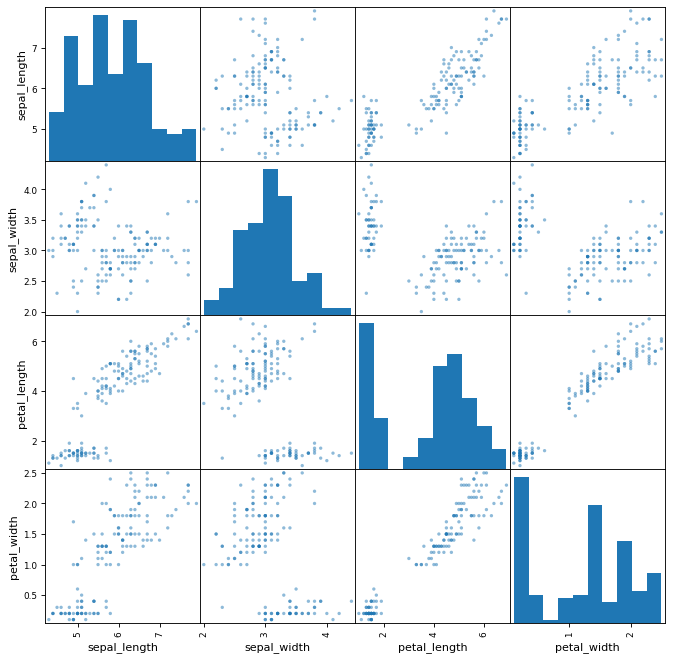

In [ ]:
scatter_matrix(iris_data_cln, figsize=(10, 10))
plt.show()

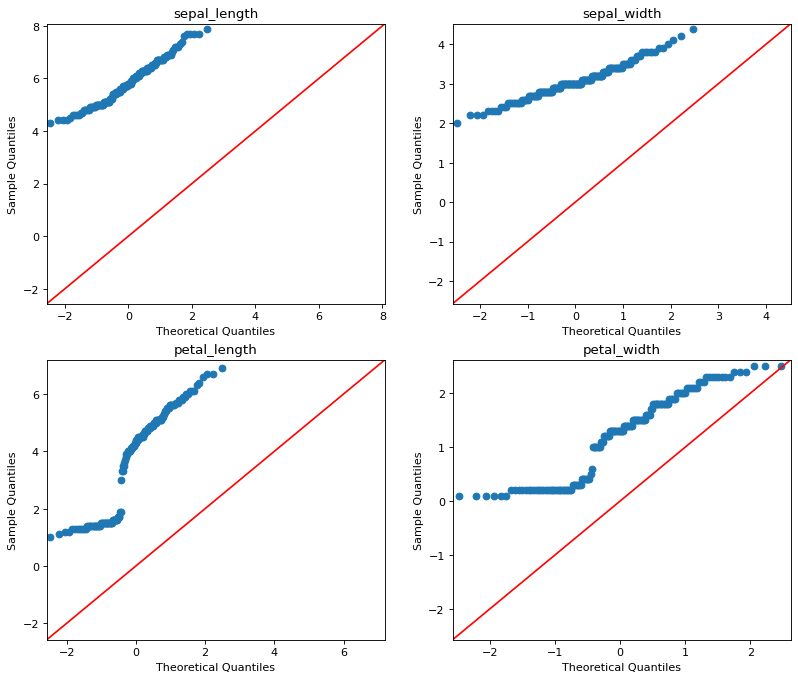

In [ ]:
fig = plt.figure(figsize=(12, 10))

left = -1.8

columns = iris_data_cln.select_dtypes(include=np.number).columns

for index, col in enumerate(columns, start=1):
  ax = fig.add_subplot(2, 2, index)
  sm.graphics.qqplot(iris_data_cln[col], line='45', ax=ax)
  ax.set_title(col)

## **Отделяем целевую переменную**

In [ ]:
Y = iris_data_cln['species'].to_frame()
X = iris_data_cln.drop('species', axis=1)

## **Нормализация**

In [ ]:
scaler = MinMaxScaler()

scaler_X = scaler.fit_transform(X)

X_norm = pd.DataFrame(scaler_X,
                      columns=X.columns)

X_norm.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


## **Добавляем признаков**

In [ ]:
cols = X_norm.columns

for index, col_name_1 in enumerate(cols):
  for col_name_2 in cols[index:]:
    name = col_name_1+'*'+col_name_2
    X_norm[name] = X_norm[col_name_1]*X_norm[col_name_2]

X_norm.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length*sepal_length,sepal_length*sepal_width,sepal_length*petal_length,sepal_length*petal_width,sepal_width*sepal_width,sepal_width*petal_length,sepal_width*petal_width,petal_length*petal_length,petal_length*petal_width,petal_width*petal_width
0,0.222222,0.625000,0.067797,0.041667,0.049383,0.138889,0.015066,0.009259,0.390625,0.042373,0.026042,0.004596,0.002825,0.001736
1,0.166667,0.416667,0.067797,0.041667,0.027778,0.069444,0.011299,0.006944,0.173611,0.028249,0.017361,0.004596,0.002825,0.001736
2,0.111111,0.500000,0.050847,0.041667,0.012346,0.055556,0.005650,0.004630,0.250000,0.025424,0.020833,0.002585,0.002119,0.001736
3,0.083333,0.458333,0.084746,0.041667,0.006944,0.038194,0.007062,0.003472,0.210069,0.038842,0.019097,0.007182,0.003531,0.001736
4,0.194444,0.666667,0.067797,0.041667,0.037809,0.129630,0.013183,0.008102,0.444444,0.045198,0.027778,0.004596,0.002825,0.001736


## **Визуализация 2**

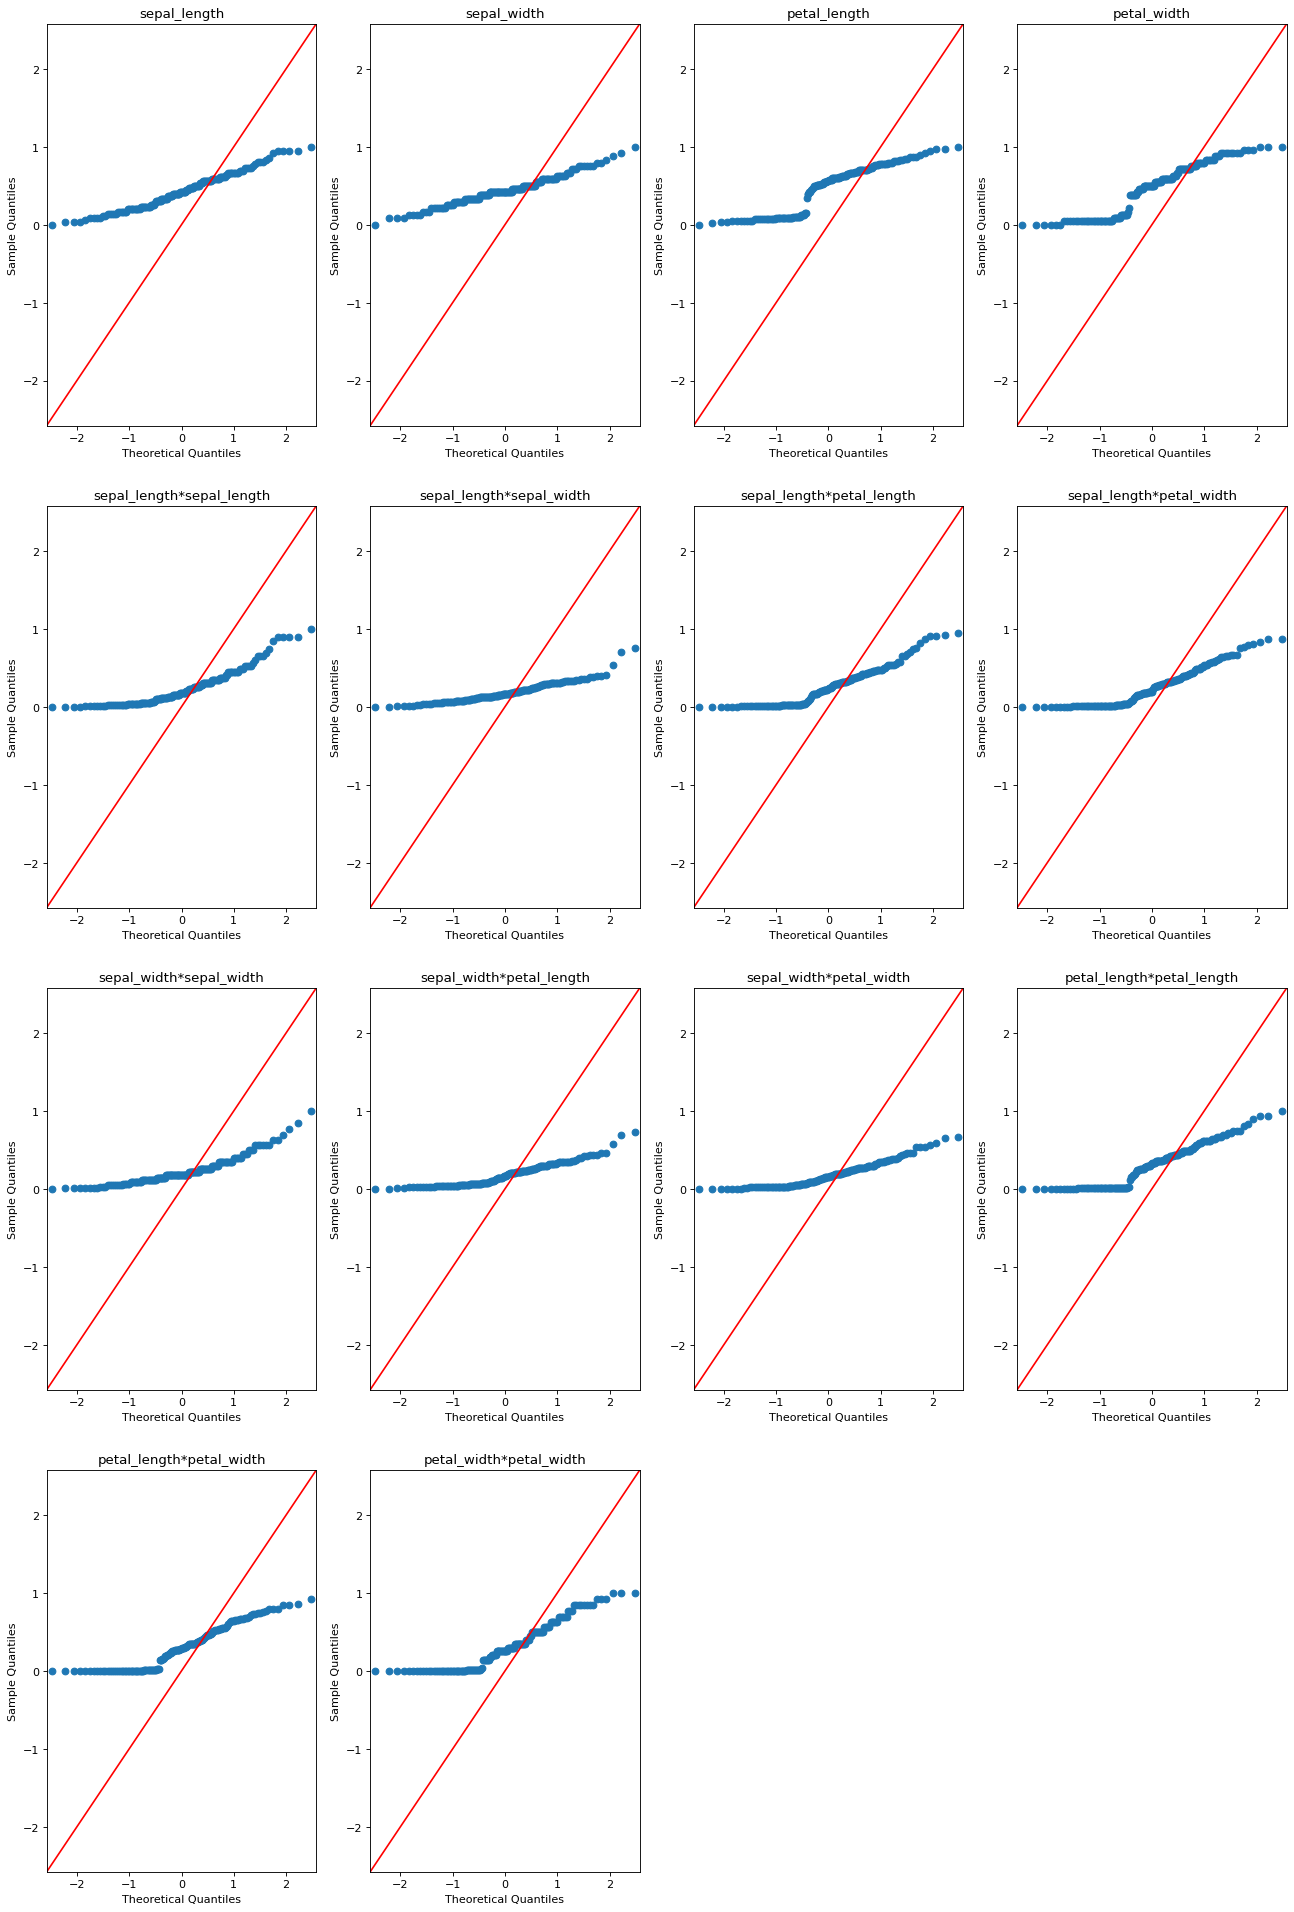

In [ ]:
fig = plt.figure(figsize=(20, 30))

columns = X_norm.columns

for index, col in enumerate(columns, start=1):
  ax = fig.add_subplot(4, ceil(len(columns)/4), index)
  sm.graphics.qqplot(X_norm[col], line='45', ax=ax)
  ax.set_title(col)

# **Разбиваем датасет на тестовый и тренировочный**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.5,
                                                    stratify = Y,
                                                    random_state=3)

In [ ]:
y_train.value_counts(normalize=True)

species        
iris-setosa        0.333333
iris-versicolor    0.333333
iris-virginica     0.333333
dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

species        
iris-setosa        0.333333
iris-versicolor    0.333333
iris-virginica     0.333333
dtype: float64

# **Решающее дерево**

## **Модель**

In [ ]:
decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
decision_tree.score(X_test, y_test)

0.96

[Text(0.4, 0.8333333333333334, 'x[6] <= 0.061\ngini = 0.667\nsamples = 75\nvalue = [25, 25, 25]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 25\nvalue = [25, 0, 0]'),
 Text(0.6, 0.5, 'x[12] <= 0.394\ngini = 0.5\nsamples = 50\nvalue = [0, 25, 25]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 25\nvalue = [0, 25, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 25\nvalue = [0, 0, 25]')]

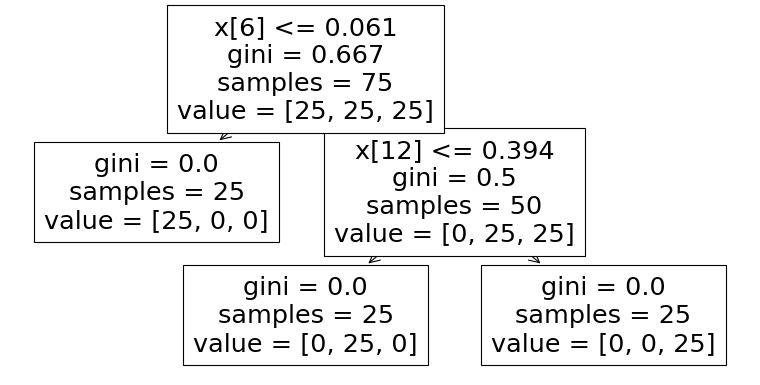

In [ ]:
from sklearn.tree import plot_tree

plot_tree(decision_tree)

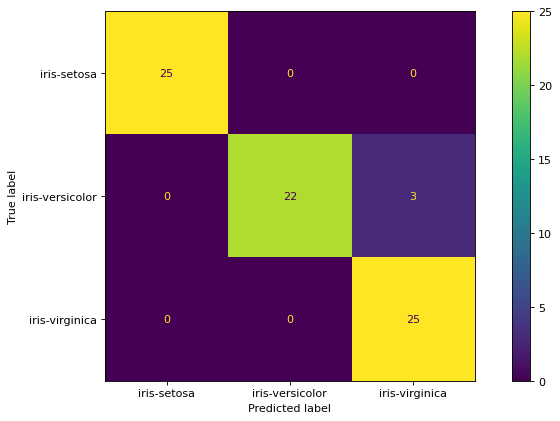

In [ ]:
y_pred = decision_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,     display_labels=decision_tree.classes_)
disp.plot()

## **Подбираем глубину дерева**

In [ ]:
dict_tree = {'max_depth':[],
              'accuracy_train':[],
              'accuracy_test':[]}

max_depths = [5, 10, 15, 17,19,21, 23, 25, 30, 35]

for max_depth in max_depths:
    decision_tree = DecisionTreeClassifier(max_depth = max_depth)
    decision_tree.fit(X_train, y_train )
    dict_tree['max_depth'].append(max_depth)
    dict_tree['accuracy_train'].append(decision_tree.score(X_train, y_train))
    dict_tree['accuracy_test'].append(decision_tree.score(X_test, y_test))

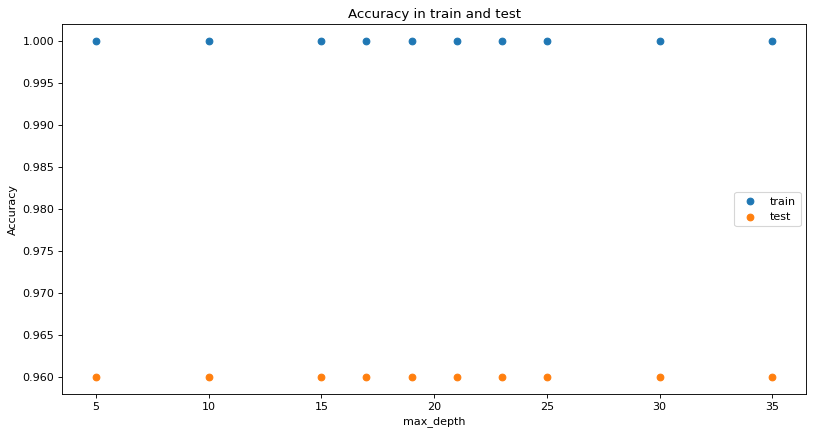

In [ ]:
plt.scatter(dict_tree['max_depth'], dict_tree['accuracy_train'], label = 'train')
plt.scatter(dict_tree['max_depth'], dict_tree['accuracy_test'], label = 'test')
plt.title('Accuracy in train and test')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
dict_tree

{'max_depth': [5, 10, 15, 17, 19, 21, 23, 25, 30, 35],
 'accuracy_train': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 'accuracy_test': [0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96]}

# **Bagging (Bootstrap aggrigating)**

In [ ]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth = 20), n_estimators=100).fit(X_train, y_train)

bag_clf.score(X_test, y_test)

0.96

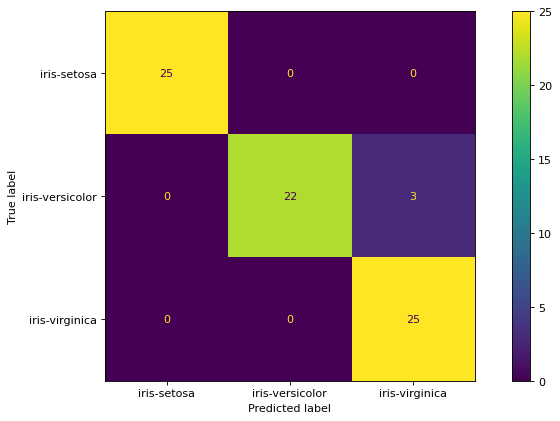

In [ ]:
y_pred = bag_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=bag_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bag_clf.classes_)
disp.plot()

In [ ]:
bag_clf = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth = 10), n_estimators=1000).fit(X_train, y_train)
bag_clf.score(X_test, y_test)

0.96

# **Случайный лес**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#T = 20, m = 3
rf = RandomForestClassifier(n_estimators=1000, max_depth=20, max_features=3).fit(X_train, y_train)
rf.score(X_test, y_test)

0.9466666666666667

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=20, max_features=5).fit(X_train, y_train)
rf.score(X_test, y_test)

0.9466666666666667

In [ ]:
rf = RandomForestClassifier(n_estimators=1000, max_depth=20, max_features=7).fit(X_train, y_train)
rf.score(X_test, y_test)

0.9466666666666667

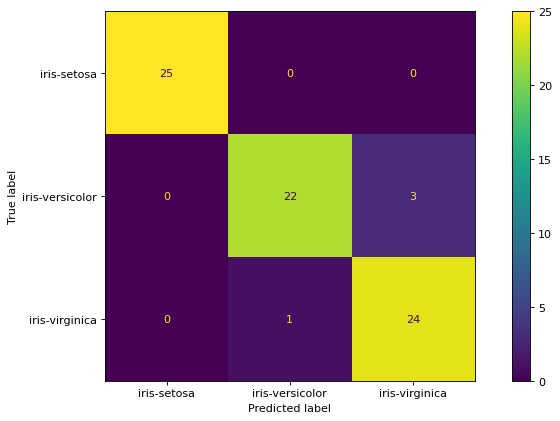

In [ ]:
y_pred = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()

# **oob-score**

In [ ]:
clf = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth = 20), n_estimators=1000, oob_score=True).fit(X, Y)

clf.oob_score_

0.96

In [ ]:
y_pred = []

for i in clf.oob_decision_function_:
    n = i.argmax()
    if n<=2:
        y_pred.append(n+1)
    else:
        y_pred.append(n+2)

In [ ]:
# y_pred = []

# for i in clf.oob_decision_function_:
#     n = i.argmax()
#     if n==0:
#         y_pred.append('iris-sentosa')
#     elif n == 1:
#         y_pred.append('iris-versicolor')
#     else:
#         y_pred.append('iris-virginica')


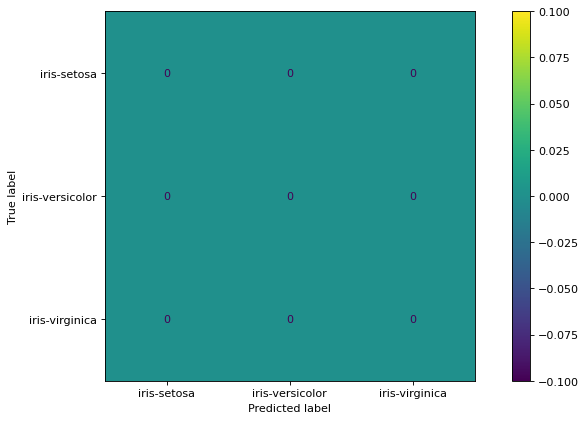

In [ ]:
cm = confusion_matrix(Y, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

# **Градиентный бустинг**

In [ ]:
from catboost import CatBoostClassifier

model = CatBoostClassifier(iterations=1000, custom_metric=['Accuracy'], learning_rate=0.1)
# cat_features = ['species']

model.fit(X_train, y_train,  cat_features=None, plot=True, eval_set = (X_test, y_test), use_best_model=True, )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0074952	test: 1.0073674	best: 1.0073674 (0)	total: 9.22ms	remaining: 9.21s
1:	learn: 0.9213160	test: 0.9303552	best: 0.9303552 (1)	total: 11.3ms	remaining: 5.64s
2:	learn: 0.8624864	test: 0.8708783	best: 0.8708783 (2)	total: 13ms	remaining: 4.33s
3:	learn: 0.7936026	test: 0.8115254	best: 0.8115254 (3)	total: 14.7ms	remaining: 3.66s
4:	learn: 0.7257268	test: 0.7391864	best: 0.7391864 (4)	total: 15.5ms	remaining: 3.09s
5:	learn: 0.6657481	test: 0.6845137	best: 0.6845137 (5)	total: 17.2ms	remaining: 2.84s
6:	learn: 0.6192931	test: 0.6401871	best: 0.6401871 (6)	total: 18.8ms	remaining: 2.67s
7:	learn: 0.5764196	test: 0.6059587	best: 0.6059587 (7)	total: 20.5ms	remaining: 2.54s
8:	learn: 0.5437108	test: 0.5744885	best: 0.5744885 (8)	total: 22.1ms	remaining: 2.44s
9:	learn: 0.5140249	test: 0.5420795	best: 0.5420795 (9)	total: 23.8ms	remaining: 2.36s
10:	learn: 0.4832567	test: 0.5149042	best: 0.5149042 (10)	total: 25.4ms	remaining: 2.28s
11:	learn: 0.4532676	test: 0.4876679	best: 

In [ ]:
model.score(X_test, y_test)

0.96